In [104]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pprint import pprint as pp

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('./oxford-data/OxCGRT_latest.csv', parse_dates=["Date"])

In [4]:
print(df.shape)

(28096, 42)


In [5]:
df.head()

CountryName CountryCode       Date  C1_School closing  C1_Flag  \
0       Aruba         ABW 2020-01-01                0.0      NaN   
1       Aruba         ABW 2020-01-02                0.0      NaN   
2       Aruba         ABW 2020-01-03                0.0      NaN   
3       Aruba         ABW 2020-01-04                0.0      NaN   
4       Aruba         ABW 2020-01-05                0.0      NaN   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                   0.0      NaN                      0.0      NaN   
1                   0.0      NaN                      0.0      NaN   
2                   0.0      NaN                      0.0      NaN   
3                   0.0      NaN                      0.0      NaN   
4                   0.0      NaN                      0.0      NaN   

   C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  C5_Flag  \
0                            0.0      NaN                        0.0      NaN   
1                            0.0      NaN                        0.0      NaN   
2                            0.0      NaN                        0.0      NaN   
3                            0.0      NaN                        0.0      NaN   
4                            0.0      NaN                        0.0      NaN   

   C6_Stay at home requirements  C6_Flag  \
0                           0.0      NaN   
1                           0.0      NaN   
2                           0.0      NaN   
3                           0.0      NaN   
4                           0.0      NaN   

   C7_Restrictions on internal movement  C7_Flag  \
0                                   0.0      NaN   
1                                   0.0      NaN   
2                                   0.0      NaN   
3                                   0.0      NaN   
4                                   0.0      NaN   

   C8_International travel controls  E1_Income support  E1_Flag  \
0                               0.0                0.0      NaN   
1                               0.0                0.0      NaN   
2                               0.0                0.0      NaN   
3                               0.0                0.0      NaN   
4                               0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  M1_Wildcard  ConfirmedCases  ConfirmedDeaths  \
0                        0.0          NaN             NaN              NaN   
1                        0.0          NaN             NaN              NaN   
2                        0.0          NaN             NaN              NaN   
3                        0.0          NaN             NaN              NaN   
4                        0.0          NaN             NaN              NaN 

In [6]:
df.nunique(axis=0)

CountryName                               176
CountryCode                               176
Date                                      161
C1_School closing                           4
C1_Flag                                     2
C2_Workplace closing                        4
C2_Flag                                     2
C3_Cancel public events                     3
C3_Flag                                     2
C4_Restrictions on gatherings               5
C4_Flag                                     2
C5_Close public transport                   3
C5_Flag                                     2
C6_Stay at home requirements                4
C6_Flag                                     2
C7_Restrictions on internal movement        3
C7_Flag                                     2
C8_International travel controls            5
E1_Income support                           3
E1_Flag                                     2
E2_Debt/contract relief                     3
E3_Fiscal measures                

In [7]:
df.CountryName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Democratic Republic of Congo', 'Congo', 'Colombia',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong',
       'Honduras', 'Croatia',

In [8]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

C1_School closing       C1_Flag C2_Workplace closing       C2_Flag  \
count      27139.000000  14033.000000         27129.000000  12459.000000   
mean           1.487711      0.929737             1.049172      0.815154   
std            1.462740      0.255599             1.221013      0.388188   
min            0.000000      0.000000             0.000000      0.000000   
25%            0.000000      1.000000             0.000000      1.000000   
50%            2.000000      1.000000             0.000000      1.000000   
75%            3.000000      1.000000             2.000000      1.000000   
max            3.000000      1.000000             3.000000      1.000000   

      C3_Cancel public events       C3_Flag C4_Restrictions on gatherings  \
count            27113.000000  14356.000000                  27115.000000   
mean                 1.018884      0.908122                      1.610585   
std                  0.979585      0.288864                      1.801309   
min                  0.000000      0.000000                      0.000000   
25%                  0.000000      1.000000                      0.000000   
50%                  1.000000      1.000000                      0.000000   
75%                  2.000000      1.000000                      4.000000   
max                  2.000000      1.000000                      4.000000   

            C4_Flag C5_Close public transport      C5_Flag  \
count  12600.000000              27127.000000  9169.000000   
mean       0.902381                  0.518929     0.773149   
std        0.296811                  0.781996     0.418819   
min        0.000000                  0.000000     0.000000   
25%        1.000000                  0.000000     1.000000   
50%        1.000000                  0.000000     1.000000   
75%        1.000000                  1.000000     1.000000   
max        1.000000                  2.000000     1.000000   

      C6_Stay at home requirements       C6_Flag  \
count                 27142.000000  11324.000000   
mean                      0.759856      0.794684   
std                       0.993638      0.403950   
min                       0.000000      0.000000   
25%                       0.000000      1.000000   
50%                       0.000000      1.000000   
75%                       2.000000      1.000000   
max                       3.000000      1.000000   

      C7_Restrictions on internal movement       C7_Flag  \
count                         27114.000000  11567.000000   
mean                              0.760825      0.706233   
std                               0.922192      0.455506   
min                               0.000000      0.000000   
25%                               0.000000      0.000000   
50%                               0.000000      1.000000   
75%                               2.000000      1.000000   
max                               2.000000      1.000000   

      C8_International travel controls E1_Income support      E1_Flag  \
count                     27145.000000      27095.000000  7731.000000   
mean                          2.118696          0.395682     0.571207   
std                           1.719215          0.678115     0.494936   
min                           0.000000          0.000000     0.000000   
25%                           0.000000          0.000000     0.000000   
50%                           3.000000          0.000000     1.000000   
75%                           4.000000          1.000000     1.000000   
max                           4.000000          2.000000     1.000000   

      E2_Debt/contract relief    E3_Fiscal measures E4_International support  \
count            27085.000000          26862.000000             27237.000000   
mean                 0.502381      425923578.757382          32265793.481262   
std                  0.786017    18348550917.497570        5059809287.578986   
min                  0.000000              0.000000                 0.000000   


<ipython-input-9-7c19554936e4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  num_cases = df.groupby('Date', as_index=False)['ConfirmedCases', 'ConfirmedDeaths'].sum()


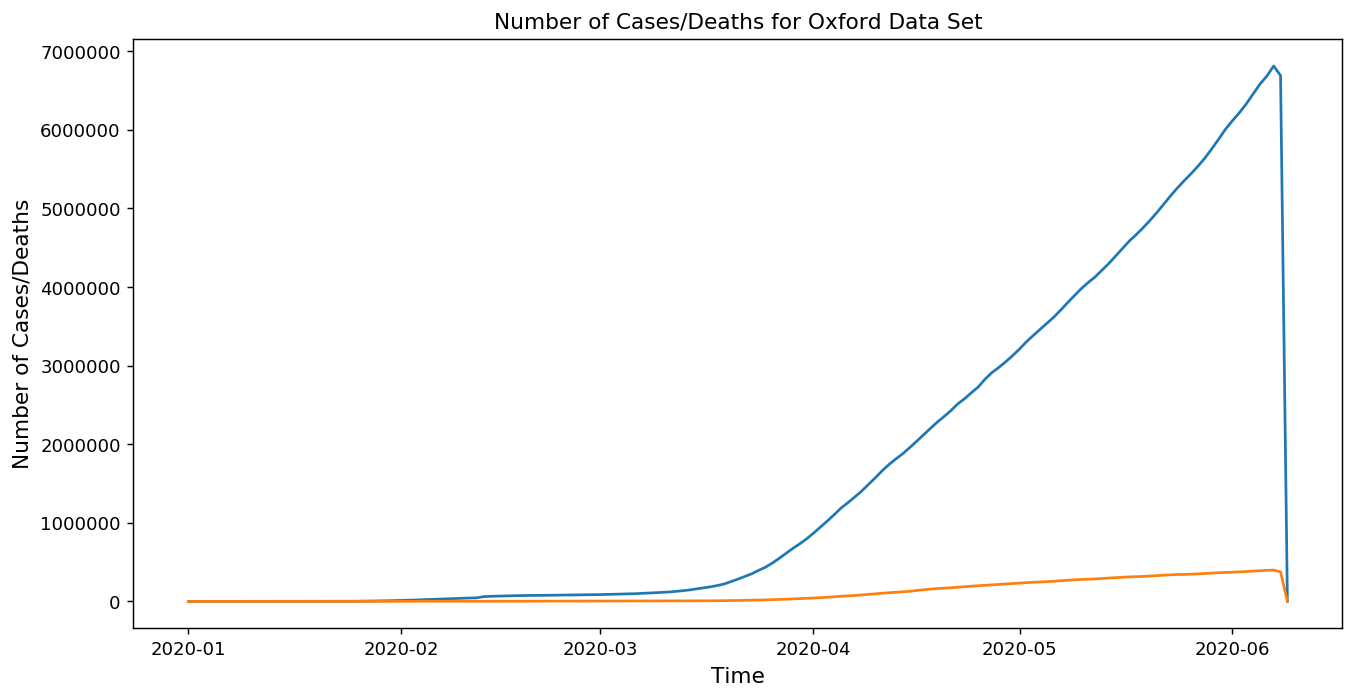

In [9]:
num_cases = df.groupby('Date', as_index=False)['ConfirmedCases', 'ConfirmedDeaths'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Number of Cases/Deaths', fontsize = 12)
plt.title('Number of Cases/Deaths for Oxford Data Set')
plt.plot('Date', 'ConfirmedCases', data=num_cases)
plt.plot('Date', 'ConfirmedDeaths', data=num_cases)
plt.show()

In [10]:
selected_country = 'United States'
country_df = df.loc[df['CountryName'] == selected_country]

In [11]:
country_df

CountryName CountryCode       Date  C1_School closing  C1_Flag  \
26336  United States         USA 2020-01-01                0.0      NaN   
26337  United States         USA 2020-01-02                0.0      NaN   
26338  United States         USA 2020-01-03                0.0      NaN   
26339  United States         USA 2020-01-04                0.0      NaN   
26340  United States         USA 2020-01-05                0.0      NaN   
...              ...         ...        ...                ...      ...   
26491  United States         USA 2020-06-04                3.0      0.0   
26492  United States         USA 2020-06-05                NaN      NaN   
26493  United States         USA 2020-06-06                NaN      NaN   
26494  United States         USA 2020-06-07                NaN      NaN   
26495  United States         USA 2020-06-08                NaN      NaN   

       C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
26336                   0.0      NaN                      0.0      NaN   
26337                   0.0      NaN                      0.0      NaN   
26338                   0.0      NaN                      0.0      NaN   
26339                   0.0      NaN                      0.0      NaN   
26340                   0.0      NaN                      0.0      NaN   
...                     ...      ...                      ...      ...   
26491                   3.0      0.0                      2.0      0.0   
26492                   NaN      NaN                      NaN      NaN   
26493                   NaN      NaN                      NaN      NaN   
26494                   NaN      NaN                      NaN      NaN   
26495                   NaN      NaN                      NaN      NaN   

       C4_Restrictions on gatherings  C4_Flag  C5_Close public transport  \
26336                            0.0      NaN                        0.0   
26337                            0.0      NaN                        0.0   
26338                            0.0      NaN                        0.0   
26339                            0.0      NaN                        0.0   
26340                            0.0      NaN                        0.0   
...                              ...      ...                        ...   
26491                            4.0      0.0                        1.0   
26492                            NaN      NaN                        NaN   
26493                            NaN      NaN                        NaN   
26494                            NaN      NaN                        NaN   
26495                            NaN      NaN                        NaN   

       C5_Flag  C6_Stay at home requirements  C6_Flag  \
26336      NaN                           0.0      NaN   
26337      NaN                           0.0      NaN   
26338      NaN                           0.0      NaN   
26339      NaN                           0.0      NaN   
26340      NaN                           0.0      NaN   
...        ...                           ...      ...   
26491      0.0                           2.0      0.0   
26492      NaN                           NaN      NaN   
26493      NaN                           NaN      NaN   
26494      NaN                           NaN      NaN   
26495      NaN                           NaN      NaN   

       C7_Restrictions on internal movement  C7_Flag  \
26336                                   0.0      NaN   
26337                                   0.0      NaN   
26338                                   0.0      NaN   
26339                                   0.0      NaN   
26340                                   0.0      NaN   
...                                     ...      ...   
26491                                   2.0      0.0   
26492                                   NaN      NaN   
26493                                   NaN      NaN   
26494                                   NaN      NaN   
26495

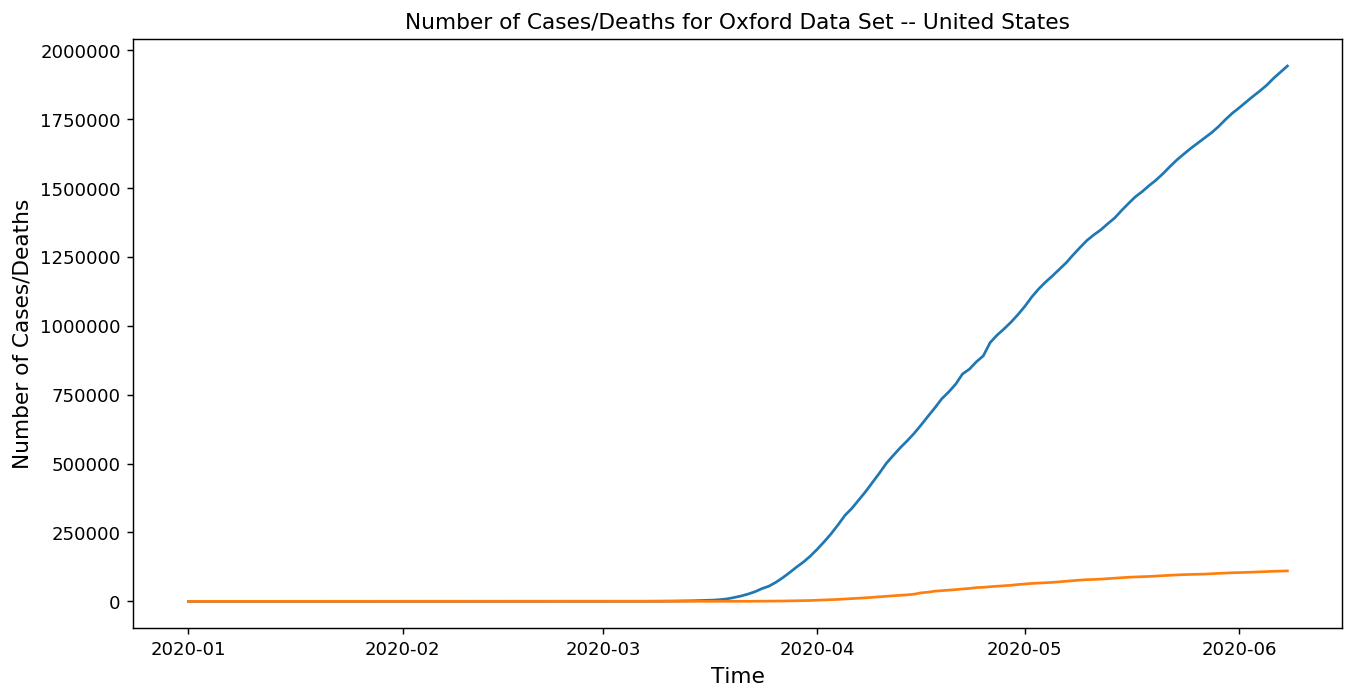

In [12]:
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Number of Cases/Deaths', fontsize = 12)
plt.title('Number of Cases/Deaths for Oxford Data Set -- {}'.format(selected_country))
plt.plot('Date', 'ConfirmedCases', data = country_df)
plt.plot('Date', 'ConfirmedDeaths', data = country_df)
plt.show()

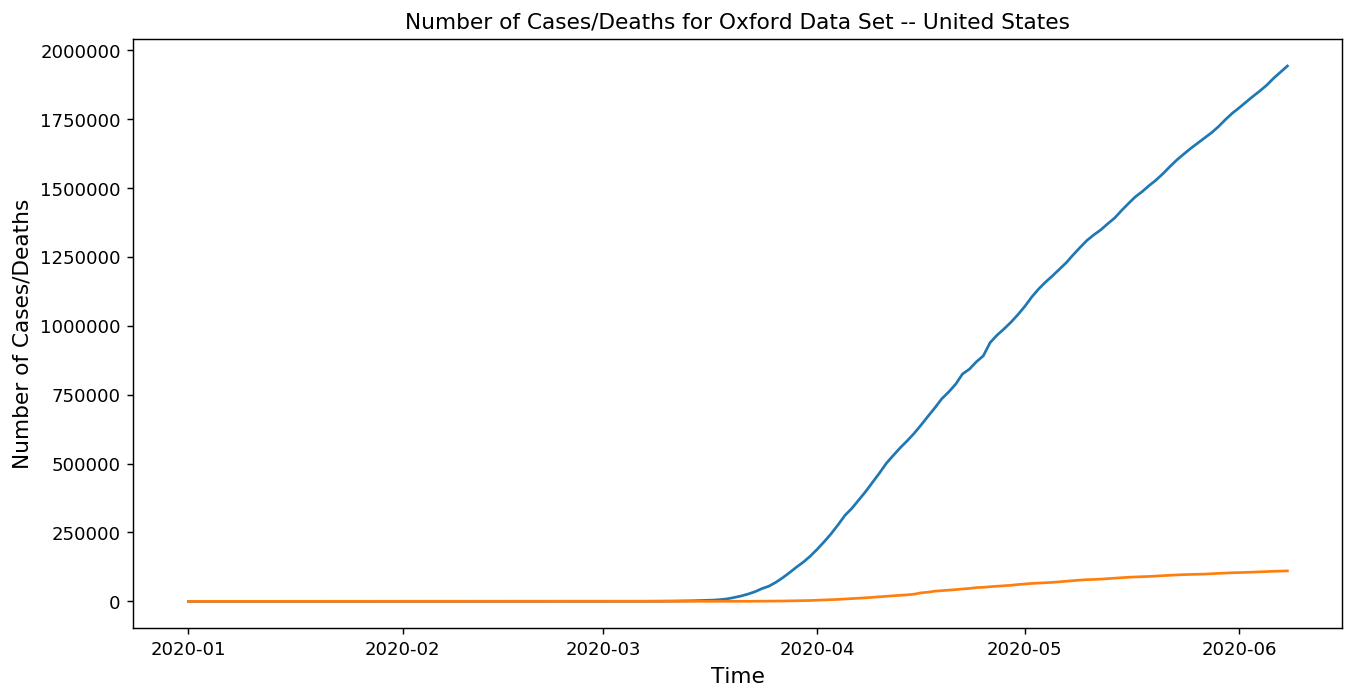

In [13]:
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Number of Cases/Deaths', fontsize = 12)
plt.title('Number of Cases/Deaths for Oxford Data Set -- {}'.format(selected_country))
plt.plot('Date', 'ConfirmedCases', data = country_df)
plt.plot('Date', 'ConfirmedDeaths', data = country_df)
plt.show()

In [20]:
control_requirements = ['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement', 'C8_International travel controls']
health_requirements = ['H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines']
fiscal_flags = ['E1_Income support', 'E2_Debt/contract relief', 'E3_Fiscal measures', 'E4_International support']
display_index = ['StringencyIndexForDisplay', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndexForDisplay', 'EconomicSupportIndexForDisplay']

key_metrics = ['Date', 'ConfirmedCases', 'ConfirmedDeaths']

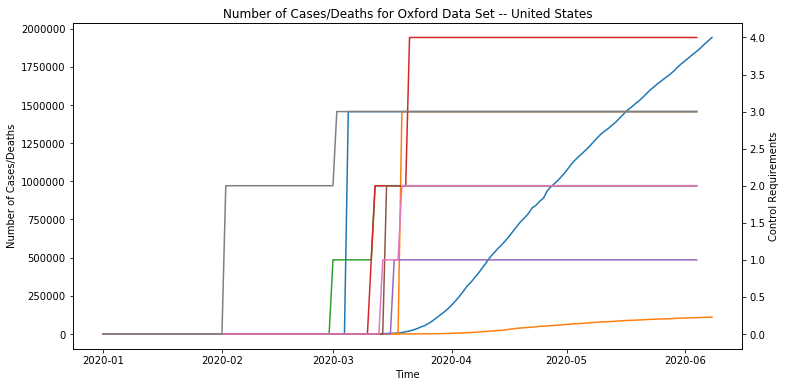

In [15]:
country_control_df = country_df.loc[:, control_requirements + key_metrics]
handles = []

fig, ax1 = plt.subplots(figsize=(12,6))

handles.append(ax1.plot('Date', 'ConfirmedCases', data = country_df, label='ConfirmedCases'))
handles.append(ax1.plot('Date', 'ConfirmedDeaths', data = country_df, label='ConfirmedDeaths'))
ax2 = ax1.twinx()

for req in control_requirements:
    handles.append(ax2.plot('Date', req, data = country_control_df, label=req))

ax1.set_xlabel('Time')
ax1.set_ylabel('Number of Cases/Deaths')
ax2.set_ylabel('Control Requirements')
plt.title('Number of Cases/Deaths for Oxford Data Set -- {}'.format(selected_country))
# plt.legend(handles=handles)

plt.show()

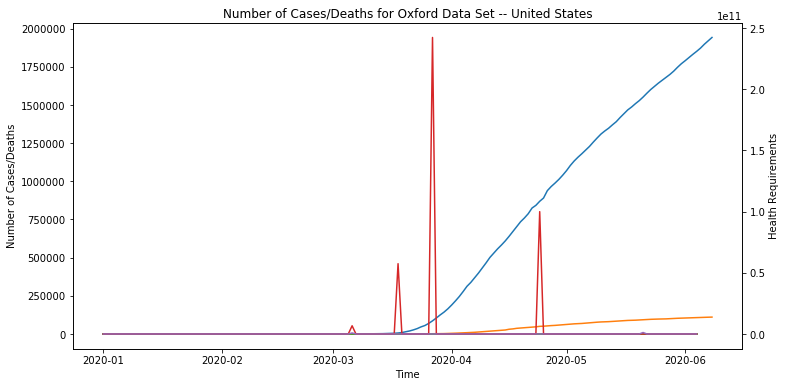

In [16]:
country_control_df = country_df.loc[:, health_requirements + key_metrics]
handles = []

fig, ax1 = plt.subplots(figsize=(12,6))

handles.append(ax1.plot('Date', 'ConfirmedCases', data = country_df, label='ConfirmedCases'))
handles.append(ax1.plot('Date', 'ConfirmedDeaths', data = country_df, label='ConfirmedDeaths'))
ax2 = ax1.twinx()

for req in health_requirements:
    handles.append(ax2.plot('Date', req, data = country_control_df, label=req))

ax1.set_xlabel('Time')
ax1.set_ylabel('Number of Cases/Deaths')
ax2.set_ylabel('Health Requirements')
plt.title('Number of Cases/Deaths for Oxford Data Set -- {}'.format(selected_country))
# plt.legend(handles=handles)

plt.show()

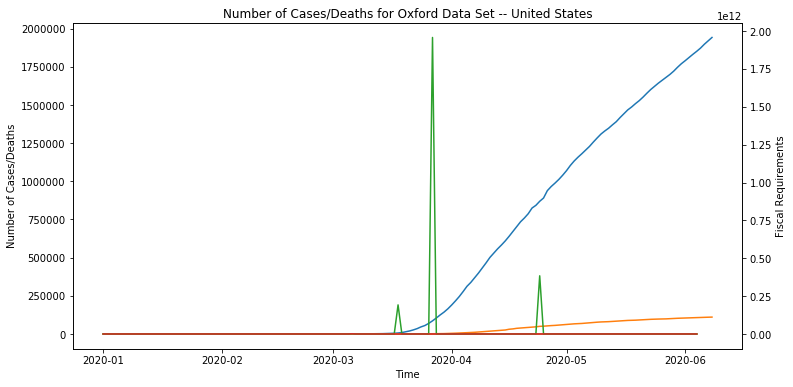

In [18]:
country_control_df = country_df.loc[:, fiscal_flags + key_metrics]
handles = []

fig, ax1 = plt.subplots(figsize=(12,6))

handles.append(ax1.plot('Date', 'ConfirmedCases', data = country_df, label='ConfirmedCases'))
handles.append(ax1.plot('Date', 'ConfirmedDeaths', data = country_df, label='ConfirmedDeaths'))
ax2 = ax1.twinx()

for req in fiscal_flags:
    handles.append(ax2.plot('Date', req, data = country_control_df, label=req))

ax1.set_xlabel('Time')
ax1.set_ylabel('Number of Cases/Deaths')
ax2.set_ylabel('Fiscal Requirements')
plt.title('Number of Cases/Deaths for Oxford Data Set -- {}'.format(selected_country))
# plt.legend(handles=handles)

plt.show()

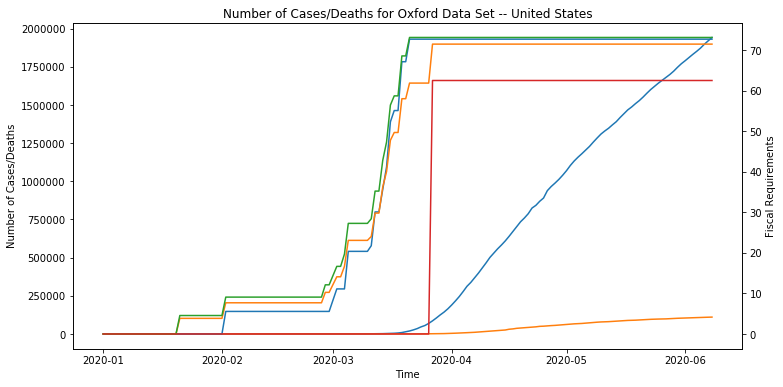

In [22]:
country_control_df = country_df.loc[:, display_index + key_metrics]
handles = []

fig, ax1 = plt.subplots(figsize=(12,6))

handles.append(ax1.plot('Date', 'ConfirmedCases', data = country_df, label='ConfirmedCases'))
handles.append(ax1.plot('Date', 'ConfirmedDeaths', data = country_df, label='ConfirmedDeaths'))
ax2 = ax1.twinx()

for req in display_index:
    handles.append(ax2.plot('Date', req, data = country_control_df, label=req))

ax1.set_xlabel('Time')
ax1.set_ylabel('Number of Cases/Deaths')
ax2.set_ylabel('Fiscal Requirements')
plt.title('Number of Cases/Deaths for Oxford Data Set -- {}'.format(selected_country))
# plt.legend(handles=handles)

plt.show()

In [25]:
ordinal_columns = ['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement', 'C8_International travel controls', 'E1_Income support', 'E2_Debt/contract relief', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing']
continuos_columns = ['E3_Fiscal measures', 'E4_International support', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines']
key_metrics = ['Date', 'ConfirmedCases', 'ConfirmedDeaths', 'CountryName']

In [41]:
ordinal_df = df.loc[:, key_metrics + ordinal_columns]
continious_df = df.loc[:, continuos_columns + key_metrics]

In [42]:
ordinal_df.head()

Date  ConfirmedCases  ConfirmedDeaths CountryName  C1_School closing  \
0 2020-01-01             NaN              NaN       Aruba                0.0   
1 2020-01-02             NaN              NaN       Aruba                0.0   
2 2020-01-03             NaN              NaN       Aruba                0.0   
3 2020-01-04             NaN              NaN       Aruba                0.0   
4 2020-01-05             NaN              NaN       Aruba                0.0   

   C2_Workplace closing  C3_Cancel public events  \
0                   0.0                      0.0   
1                   0.0                      0.0   
2                   0.0                      0.0   
3                   0.0                      0.0   
4                   0.0                      0.0   

   C4_Restrictions on gatherings  C5_Close public transport  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   

   C6_Stay at home requirements  C7_Restrictions on internal movement  \
0                           0.0                                   0.0   
1                           0.0                                   0.0   
2                           0.0                                   0.0   
3                           0.0                                   0.0   
4                           0.0                                   0.0   

   C8_International travel controls  E1_Income support  \
0                               0.0                0.0   
1                               0.0                0.0   
2                               0.0                0.0   
3                               0.0                0.0   
4                               0.0                0.0   

   E2_Debt/contract relief  H1_Public information campaigns  \
0                      0.0                              0.0   
1                      0.0                              0.0   
2                      0.0                              0.0   
3                      0.0                              0.0   
4                      0.0                              0.0   

   H2_Testing policy  H3_Contact tracing  
0                0.0                 0.0  
1                0.0                 0.0  
2                0.0                 0.0  
3                0.0                 0.0  
4                0.0                 0.0

In [43]:
country_1 = 'India'
country_2 = 'United States'

# ordinal_df_country_1 = ordinal_df.loc[ordinal_df['CountryName'] == country_1]
# ordinal_df_country_2 = ordinal_df.loc[ordinal_df['CountryName'] == country_2]

In [116]:
ordinal_country_agg_df = ordinal_df.groupby(['CountryName'])[ordinal_columns].agg('sum')
ordinal_country_agg_df

C1_School closing  C2_Workplace closing  C3_Cancel public events  \
CountryName                                                                     
Afghanistan              261.0                 231.0                    200.0   
Albania                  246.0                 172.0                    176.0   
Algeria                  252.0                 171.0                    172.0   
Andorra                  231.0                 195.0                     80.0   
Angola                   219.0                 167.0                    140.0   
...                        ...                   ...                      ...   
Venezuela                234.0                 234.0                    164.0   
Vietnam                  288.0                 170.0                    236.0   
Yemen                    258.0                 100.0                    168.0   
Zambia                   234.0                  76.0                     46.0   
Zimbabwe                 219.0                 201.0                    160.0   

             C4_Restrictions on gatherings  C5_Close public transport  \
CountryName                                                             
Afghanistan                          260.0                      146.0   
Albania                              272.0                      168.0   
Algeria                              264.0                      146.0   
Andorra                                0.0                       68.0   
Angola                               258.0                       97.0   
...                                    ...                        ...   
Venezuela                            256.0                        0.0   
Vietnam                              228.0                       97.0   
Yemen                                  0.0                        0.0   
Zambia                               239.0                        0.0   
Zimbabwe                             240.0                       67.0   

             C6_Stay at home requirements  \
CountryName                                 
Afghanistan                         152.0   
Albania                             160.0   
Algeria                             178.0   
Andorra                              80.0   
Angola                              130.0   
...                                   ...   
Venezuela                           162.0   
Vietnam                              42.0   
Yemen                                55.0   
Zambia                               52.0   
Zimbabwe                            141.0   

             C7_Restrictions on internal movement  \
CountryName                                         
Afghanistan                                 134.0   
Albania                                     160.0   
Algeria                                     146.0   
Andorra                                       0.0   
Angola                                      140.0   
...                                           ...   
Venezuela                                   162.0   
Vietnam                                     226.0   
Yemen                                        80.0   
Zambia                                       64.0   
Zimbabwe                                    141.0   

             C8_International travel controls  E1_Income support  \
CountryName                                                        
Afghanistan                             187.0                0.0   
Albania                                 339.0              119.0   
Algeria                                 248.0               52.0   
Andorra                                 141.0              160.0   
Angola                                  413.0                0.0   
...                                       ...                ...   
Venezuela                               322.0                0.0   
Vietnam                                 459.0               57.0   
Yemen                                   328.0        

In [117]:
# list((ordinal_country_agg_df.loc[ordinal_df['CountryName'] == country_1]).iloc[0, :])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = list(ordinal_country_agg_df.loc[country_1, :]),
      theta = list(ordinal_country_agg_df.columns),
      fill = 'toself',
      name = country_1
))

fig.add_trace(go.Scatterpolar(
      r = list(ordinal_country_agg_df.loc[country_2, :]),
      theta = list(ordinal_country_agg_df.columns),
      fill = 'toself',
      name = country_2
))

fig.update_layout(
  polar = dict(
    radialaxis = dict(
      visible = True
    ),
  ),
  showlegend = True,
  title=dict(text = "Policy Comparison")
)

fig.show()

In [127]:
ordinal_country_date_agg_df = ordinal_df.groupby(['CountryName', 'Date'])[key_metrics].agg('sum')
dates = list(ordinal_country_date_agg_df.index.get_level_values(1))

# Initialize figure with subplots
fig = make_subplots(rows=2, cols=1, specs=[[{'type': 'polar'}], [{'type': 'scatter'}]])

fig.add_trace(go.Scatterpolar(
        r = list(ordinal_country_agg_df.loc[country_1, :]),
        theta = list(ordinal_country_agg_df.columns),
        fill = 'toself',
        name = country_1
    ),
    1, 
    1
)

fig.add_trace(go.Scatterpolar(
        r = list(ordinal_country_agg_df.loc[country_2, :]),
        theta = list(ordinal_country_agg_df.columns),
        fill = 'toself',
        name = country_2,
    ),
    1, 
    1,
)

fig.add_trace(go.Scatter(
        x=dates,
        y=list(ordinal_country_date_agg_df.loc[pd.IndexSlice[country_1, :], :]['ConfirmedCases']),
        name=country_1 + " - Confirmed Cases",
    ),
    2, 
    1
)

fig.add_trace(go.Scatter(
        x=dates,
        y=list(ordinal_country_date_agg_df.loc[pd.IndexSlice[country_2, :], :]['ConfirmedCases']),
        name=country_2 + " - Confirmed Cases"
    ),
    2, 
    1
)

fig.add_trace(go.Scatter(
        x=dates,
        y=list(ordinal_country_date_agg_df.loc[pd.IndexSlice[country_1, :], :]['ConfirmedDeaths']),
        name=country_1 + " - Confirmed Deaths"
    ),
    2, 
    1
)

fig.add_trace(go.Scatter(
        x=dates,
        y=list(ordinal_country_date_agg_df.loc[pd.IndexSlice[country_2, :], :]['ConfirmedDeaths']),
        name=country_2 + "- Confirmed Deaths"
    ),
    2, 
    1
)

fig.update_layout(height=800, width=1000, title_text="Comparison of Policies and Cases")

fig.show()